## Unit 7 | Assignment - Distinguishing Sentiments

## Background

__Twitter__ has become a wildly sprawling jungle of information&mdash;140 characters at a time.
Somewhere between 350 million and 500 million tweets are estimated to be sent out _per day_.
With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever 
to tame it in some way, to concisely capture the essence of the data.


## News Mood

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

In [90]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
from datetime import datetime
import seaborn as sns

In [91]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [92]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''


In [93]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [94]:
def sentiment_analyter (user):
    
    # Array to hold sentiment
    sentiment_dict = []
    sentiment_mean = [] 
    compound_list = []
    # Counter
    counter = 1
    all_tweets = []

# Loop through 2 times (total of 100 tweets)
    for x in range(2):
        if len(all_tweets) > 100:
            break

        # Run search around each tweet
        public_tweets = api.search(user, count=50, result_type="recent")

    # Loop through all tweets
        for tweet in public_tweets["statuses"]:
            all_tweets.append(tweet)

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # Add each compound value to the compound array
            compound_list.append(compound)

 
                # Store the Average Sentiments
            sentiment_dict.append( {"User": user,
                                "Date": tweet["created_at"], 
                                "Compound": compound,
                                "Positive": pos,
                                "Negative": neg,
                                "Neutral": neu,
                                "Tweets Ago": counter})
                # Counter
            counter += 1
    sentiment_mean = {user: np.mean(compound_list)}       
    return sentiment_dict, sentiment_mean

In [95]:
sentiment_dict_bbc,sentiment_mean_bbc = sentiment_analyter("@BBC")
sentiment_df_bbc = pd.DataFrame.from_dict(sentiment_dict_bbc)
#print(sentiment_mean_bbc)
#sentiment_df.head()
sentiment_df_bbc = sentiment_df_bbc.sort_values("Tweets Ago", ascending=False)
sentiment_df_bbc.reset_index(drop=True)
sentiment_df_bbc.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,User
99,0.7783,Tue Mar 27 23:10:06 +0000 2018,0.0,0.698,0.302,100,@BBC
98,0.0000,Tue Mar 27 23:10:07 +0000 2018,0.0,1.000,0.000,99,@BBC
97,0.0000,Tue Mar 27 23:10:46 +0000 2018,0.0,1.000,0.000,98,@BBC
96,0.0000,Tue Mar 27 23:10:59 +0000 2018,0.0,1.000,0.000,97,@BBC
95,0.0000,Tue Mar 27 23:11:04 +0000 2018,0.0,1.000,0.000,96,@BBC


In [96]:
# # Save the DataFrame as a csv
# sentiment_dict_bbc.to_csv("Media Analisys.csv",
#                      encoding="utf-8", index=False)

In [97]:
sentiment_dict_cbs,sentiment_mean_cbs = sentiment_analyter("@CBS")
sentiment_df_cbs = pd.DataFrame.from_dict(sentiment_dict_cbs)
#sentiment_df.head()
sentiment_df_cbs = sentiment_df_cbs.sort_values("Tweets Ago", ascending=False)
sentiment_df_cbs.reset_index(drop=True)
sentiment_df_cbs.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,User
99,0.0000,Tue Mar 27 23:09:47 +0000 2018,0.000,1.000,0.000,100,@CBS
98,-0.6956,Tue Mar 27 23:10:20 +0000 2018,0.346,0.466,0.188,99,@CBS
97,0.0000,Tue Mar 27 23:10:48 +0000 2018,0.000,1.000,0.000,98,@CBS
96,0.0000,Tue Mar 27 23:11:11 +0000 2018,0.000,1.000,0.000,97,@CBS
95,0.0000,Tue Mar 27 23:11:29 +0000 2018,0.000,1.000,0.000,96,@CBS


In [98]:
# # Save the DataFrame as a csv
# sentiment_dict_cbs.to_csv("Media Analisys.csv", mode='a', header=False
#                      encoding="utf-8", index=False)
result_df = sentiment_df_bbc.append(sentiment_df_cbs)

In [99]:
sentiment_dict_cnn,sentiment_mean_cnn = sentiment_analyter("@CNN")
sentiment_df_cnn = pd.DataFrame.from_dict(sentiment_dict_cnn)
#sentiment_df.head()
sentiment_df_cnn = sentiment_df_cnn.sort_values("Tweets Ago", ascending=False)
sentiment_df_cnn.reset_index(drop=True)
sentiment_df_cnn.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,User
99,-0.4466,Tue Mar 27 23:20:31 +0000 2018,0.164,0.836,0.000,100,@CNN
98,0.0000,Tue Mar 27 23:20:31 +0000 2018,0.000,1.000,0.000,99,@CNN
97,0.0000,Tue Mar 27 23:20:32 +0000 2018,0.000,1.000,0.000,98,@CNN
96,-0.3094,Tue Mar 27 23:20:33 +0000 2018,0.173,0.707,0.121,97,@CNN
95,-0.8658,Tue Mar 27 23:20:33 +0000 2018,0.350,0.650,0.000,96,@CNN


In [100]:
# # Save the DataFrame as a csv
# sentiment_dict_cnn.to_csv("Media Analisys.csv", mode='a', header=False
#                      encoding="utf-8", index=False)
result_df = result_df.append(sentiment_df_cnn)

In [101]:
sentiment_dict_fox,sentiment_mean_fox = sentiment_analyter("@FOXTV")
sentiment_df_fox = pd.DataFrame.from_dict(sentiment_dict_fox)
#sentiment_df.head()
sentiment_df_fox = sentiment_df_fox.sort_values("Tweets Ago", ascending=False)
sentiment_df_fox.reset_index(drop=True)
sentiment_df_fox.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,User
99,0.4199,Tue Mar 27 22:48:09 +0000 2018,0.0,0.787,0.213,100,@FOXTV
98,0.0000,Tue Mar 27 22:48:09 +0000 2018,0.0,1.000,0.000,99,@FOXTV
97,0.4199,Tue Mar 27 22:48:09 +0000 2018,0.0,0.787,0.213,98,@FOXTV
96,0.0000,Tue Mar 27 22:48:51 +0000 2018,0.0,1.000,0.000,97,@FOXTV
95,0.0000,Tue Mar 27 22:49:51 +0000 2018,0.0,1.000,0.000,96,@FOXTV


In [102]:
# # Save the DataFrame as a csv
# sentiment_dict_fox.to_csv("Media Analisys.csv", mode='a', header=False
#                      encoding="utf-8", index=False)
result_df = result_df.append(sentiment_df_fox)

In [103]:
sentiment_dict_nytimes,sentiment_mean_nytimes = sentiment_analyter("@nytimes")
sentiment_df_nytimes = pd.DataFrame.from_dict(sentiment_dict_nytimes)
#sentiment_df.head()
sentiment_df_nytimes = sentiment_df_nytimes.sort_values("Tweets Ago", ascending=False)
sentiment_df_nytimes.reset_index(drop=True)
sentiment_df_nytimes.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,User
99,-0.3400,Tue Mar 27 23:20:01 +0000 2018,0.103,0.897,0.000,100,@nytimes
98,-0.4019,Tue Mar 27 23:20:01 +0000 2018,0.130,0.870,0.000,99,@nytimes
97,0.6124,Tue Mar 27 23:20:02 +0000 2018,0.000,0.688,0.312,98,@nytimes
96,0.0000,Tue Mar 27 23:20:03 +0000 2018,0.000,1.000,0.000,97,@nytimes
95,-0.4019,Tue Mar 27 23:20:03 +0000 2018,0.130,0.870,0.000,96,@nytimes


In [104]:
# # Save the DataFrame as a csv
# sentiment_dict_nytimes.to_csv("Media Analisys.csv", mode='a', header=False
#                      encoding="utf-8", index=False)
result_df = result_df.append(sentiment_df_nytimes)
result_df.to_csv("Media Analisys.csv", encoding="utf-8", index=False )

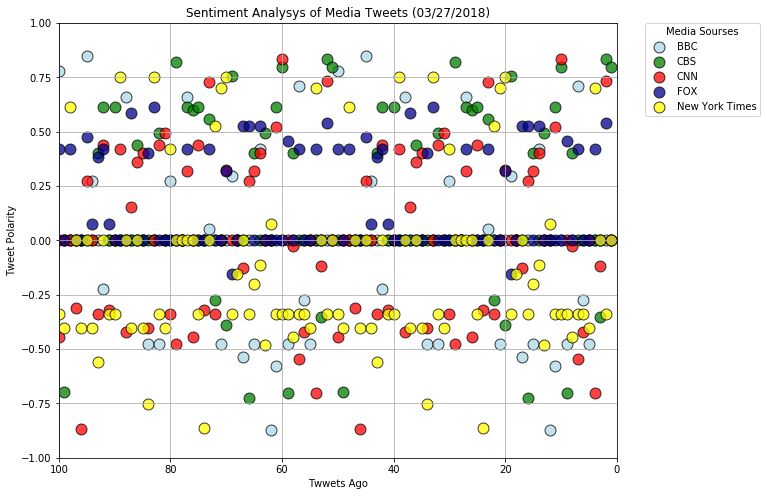

In [105]:
#plt_bbc = 
bbc = plt.scatter(sentiment_df_bbc["Tweets Ago"],sentiment_df_bbc["Compound"], s=120, facecolor='lightblue',
                   edgecolors="black",alpha=0.75, label = 'BBC')
cbs = plt.scatter(sentiment_df_cbs["Tweets Ago"],sentiment_df_cbs["Compound"], s=120, facecolor='green',
                   edgecolors="black",alpha=0.75, label = 'CBS')
cnn = plt.scatter(sentiment_df_cnn["Tweets Ago"],sentiment_df_cnn["Compound"], s=120, facecolor='red',
                   edgecolors="black",alpha=0.75, label = 'CNN')
fox = plt.scatter(sentiment_df_fox["Tweets Ago"],sentiment_df_fox["Compound"], s=120, facecolor='darkblue',
                   edgecolors="black",alpha=0.75, label = 'FOX')
nytimes = plt.scatter(sentiment_df_nytimes["Tweets Ago"],sentiment_df_nytimes["Compound"], s=120, facecolor='yellow',
                   edgecolors="black",alpha=0.75, label = 'New York Times')
plt.legend(handles=[bbc, cbs, cnn, fox,nytimes], title="Media Sourses", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.ylim(-1,1)
plt.xlim(100,0)
plt.grid(True)
plt.title("Sentiment Analysys of Media Tweets (03/27/2018)")
plt.xlabel("Twwets Ago")
plt.ylabel("Tweet Polarity")
plt.savefig("SentimentAnalisysOfMedia.png")
plt.show()


## Bar Plot: Sentiment analysys of media

In [106]:
result_dict ={**sentiment_mean_bbc, **sentiment_mean_cbs, **sentiment_mean_cnn, 
              **sentiment_mean_fox, **sentiment_mean_nytimes}

result_df = pd.DataFrame.from_dict([result_dict] )


In [107]:
y_value = result_df.iloc[0, :]
y_value

@BBC       -0.007600
@CBS        0.154416
@CNN        0.018352
@FOXTV      0.165872
@nytimes   -0.110348
Name: 0, dtype: float64

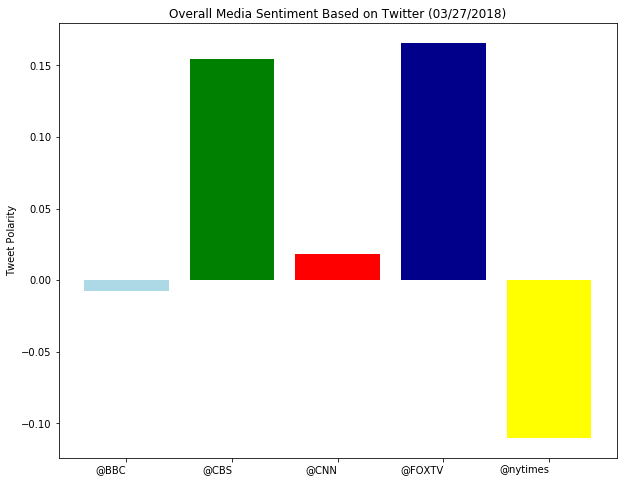

In [108]:
#target_terms = ("@BBC", "@CBS", "@CNN","@FOXTV", "@nytimes")
colors = ('lightblue', 'green','red', 'darkblue', 'yellow')
tick_locations = np.arange(len(result_df.columns))                           
plt.bar(np.arange(len(result_df.columns)), y_value,  color=colors,  align="center")
plt.xticks(tick_locations, result_df.columns, ha="right")
plt.title("Overall Media Sentiment Based on Twitter (03/27/2018)")
plt.ylabel("Tweet Polarity")
plt.savefig("TweetPolarity.png")
plt.show()

* Include a written description of three observable trends based on the data. 
According to VADER analysis on 03/27/2018 news media organizations:
1. CBS, CNN, and Fox have more positive sentiments
2. BBS and NY Times have more negative sentiments
3. CBS has most positive average compount sentiments
